In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from termcolor import colored

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings("ignore")

print(colored('\nAll libraries imported succesfully.', 'blue'))


All libraries imported succesfully.


In [ ]:
df = pd.read_csv('https://drive.google.com/uc?id=1626HJwBvkF-FfL1yvRiuRAOUv_GxdhhP')

In [ ]:
df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [ ]:
df.describe().T.style.background_gradient(axis=0)

,count,mean,std,min,25%,50%,75%,max
patientid,1000.000000,5048704.412000,2895904.500488,103368.000000,2536439.500000,4952508.500000,7681877.000000,9990855.000000
age,1000.000000,49.242000,17.864730,20.000000,34.000000,49.000000,64.250000,80.000000
gender,1000.000000,0.765000,0.424211,0.000000,1.000000,1.000000,1.000000,1.000000
chestpain,1000.000000,0.980000,0.953157,0.000000,0.000000,1.000000,2.000000,3.000000
restingBP,1000.000000,151.747000,29.965228,94.000000,129.000000,147.000000,181.000000,200.000000
serumcholestrol,1000.000000,311.447000,132.443801,0.000000,235.750000,318.000000,404.250000,602.000000
fastingbloodsugar,1000.000000,0.296000,0.456719,0.000000,0.000000,0.000000,1.000000,1.000000
restingrelectro,1000.000000,0.748000,0.770123,0.000000,0.000000,1.000000,1.000000,2.000000
maxheartrate,1000.000000,145.477000,34.190268,71.000000,119.750000,146.000000,175.000000,202.000000
exerciseangia,1000.000000,0.498000,0.500246,0.000000,0.000000,0.000000,1.000000,1.000000


In [ ]:
df.isna().sum()

,0
patientid,0
age,0
gender,0
chestpain,0
restingBP,0
serumcholestrol,0
fastingbloodsugar,0
restingrelectro,0
maxheartrate,0
exerciseangia,0


In [ ]:
df.columns

Index(['patientid', 'age', 'gender', 'chestpain', 'restingBP',
       'serumcholestrol', 'fastingbloodsugar', 'restingrelectro',
       'maxheartrate', 'exerciseangia', 'oldpeak', 'slope', 'noofmajorvessels',
       'target'],
      dtype='object')

In [ ]:
age_range = f"Age Range: {df['age'].min()} - {df['age'].max()}"
print(age_range)

Age Range: 20 - 80


In [ ]:
gender_count = df['gender'].value_counts()
print(gender_count)

gender
1    765
0    235
Name: count, dtype: int64


In [ ]:
chest_pain_counts = df['chestpain'].value_counts()
print(chest_pain_counts)

chestpain
0    420
2    312
1    224
3     44
Name: count, dtype: int64


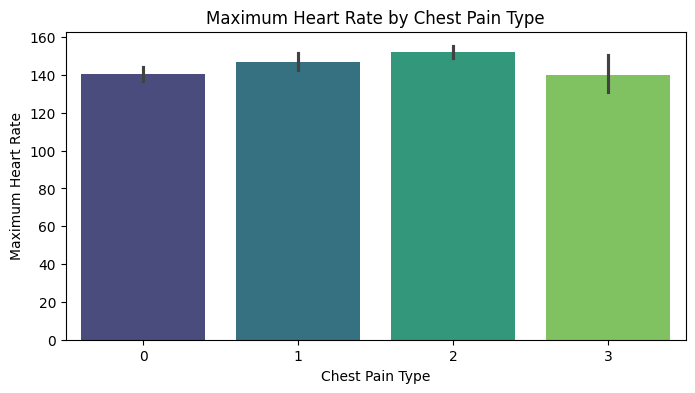

In [ ]:
# Visualization:
plt.figure(figsize=(8, 4))
sns.barplot(x='chestpain', y='maxheartrate', data=df, palette='viridis')
plt.title('Maximum Heart Rate by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Maximum Heart Rate')
plt.show()

In [ ]:
average_resting_bp = df['restingBP'].mean()
print(f"Average Resting Blood Pressure: {average_resting_bp:.2f} mm Hg")

Average Resting Blood Pressure: 151.75 mm Hg


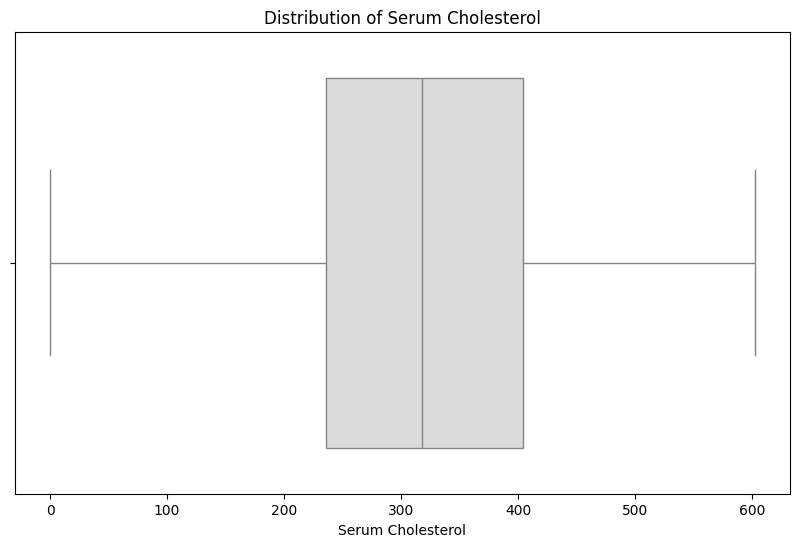

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='serumcholestrol', data=df, palette='coolwarm')
plt.title('Distribution of Serum Cholesterol')
plt.xlabel('Serum Cholesterol')
plt.show()

In [ ]:
percentage_high_fasting_sugar = (df['fastingbloodsugar'].sum() / len(df)) * 100
print(f"Percentage of patients with fasting blood sugar > 120 mg/dl: {percentage_high_fasting_sugar:.2f}%")

Percentage of patients with fasting blood sugar > 120 mg/dl: 29.60%


In [ ]:
resting_electro_counts = df['restingrelectro'].value_counts()
print(resting_electro_counts)

restingrelectro
0    454
1    344
2    202
Name: count, dtype: int64


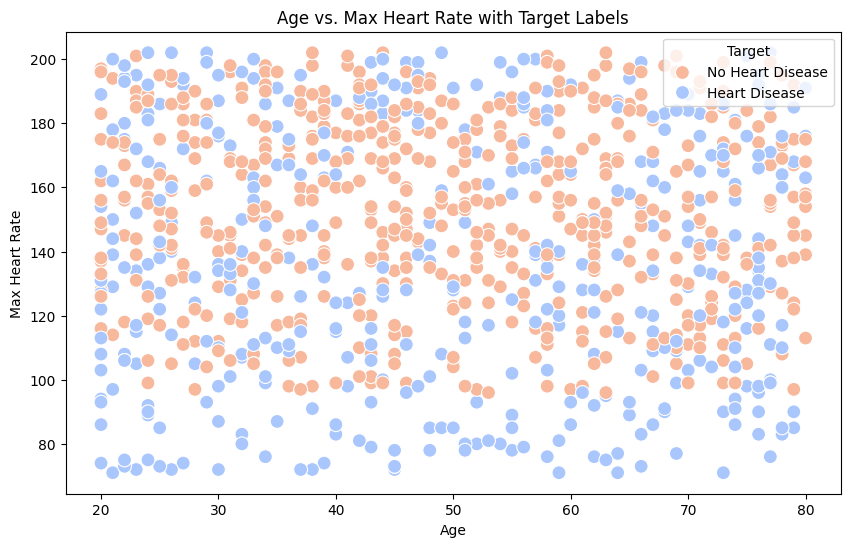

In [ ]:
# Visualization:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='maxheartrate', hue='target', data=df, palette='coolwarm', s=100)
plt.title('Age vs. Max Heart Rate with Target Labels')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(title='Target', loc='upper right', labels=['No Heart Disease', 'Heart Disease'])
plt.show()

In [ ]:
average_max_heart_rate = df['maxheartrate'].mean()
print(f"Average Maximum Heart Rate: {average_max_heart_rate:.2f}")

Average Maximum Heart Rate: 145.48


In [ ]:
exercise_angina_count = df['exerciseangia'].sum()
print(f"Number of Patients with Exercise-Induced Angina: {exercise_angina_count}")

Number of Patients with Exercise-Induced Angina: 498


In [ ]:
average_oldpeak = df['oldpeak'].mean()
print(f"Average Oldpeak: {average_oldpeak:.2f}")

Average Oldpeak: 2.71


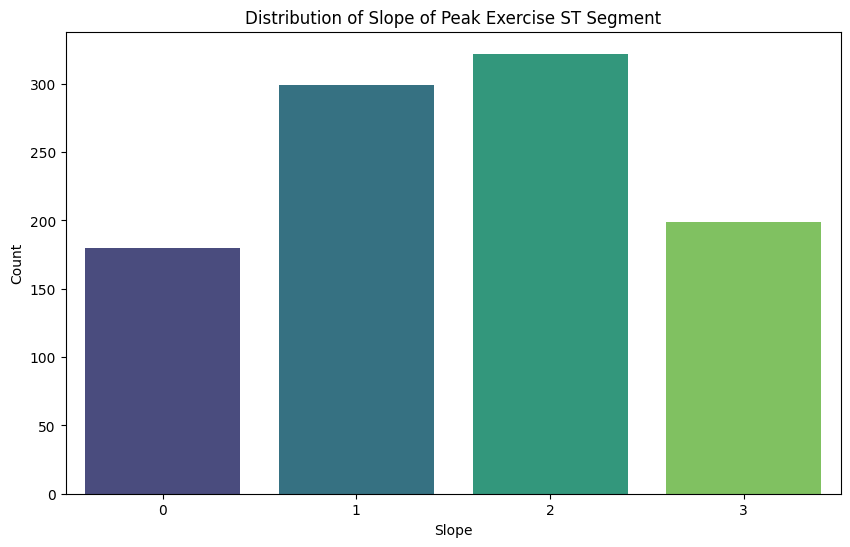

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='slope', data=df, palette='viridis')
plt.title('Distribution of Slope of Peak Exercise ST Segment')
plt.xlabel('Slope')
plt.ylabel('Count')
plt.show()

In [ ]:
vessels_range = f"Number of Major Vessels Range: {df['noofmajorvessels'].min()} - {df['noofmajorvessels'].max()}"
print(vessels_range)

Number of Major Vessels Range: 0 - 3


In [ ]:
percentage_heart_disease = (df['target'].sum() / len(df)) * 100
print(f"Percentage of Patients with Heart Disease: {percentage_heart_disease:.2f}%")

Percentage of Patients with Heart Disease: 58.00%


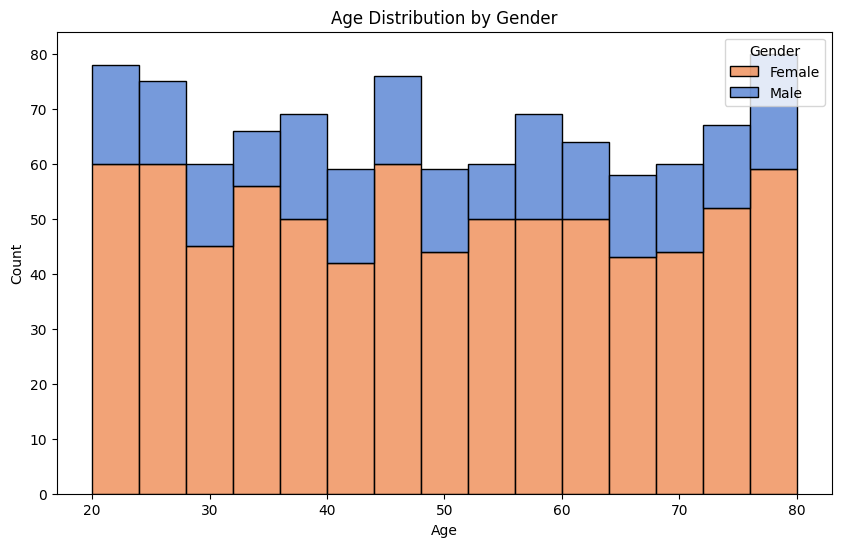

In [ ]:
# Visualization:
plt.figure(figsize=(10, 6))
sns.histplot(x='age', hue='gender', data=df, palette='muted', multiple='stack', bins=15)
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()

In [ ]:
oldest_patient = df.loc[df['age'].idxmax()]
print(f"Details of the Oldest Patient:\n{oldest_patient}")

Details of the Oldest Patient:
patientid            1160678.0
age                       80.0
gender                     1.0
chestpain                  1.0
restingBP                130.0
serumcholestrol          342.0
fastingbloodsugar          0.0
restingrelectro            0.0
maxheartrate             176.0
exerciseangia              1.0
oldpeak                    2.5
slope                      0.0
noofmajorvessels           0.0
target                     0.0
Name: 102, dtype: float64


In [ ]:
lowest_bp_patient = df.loc[df['restingBP'].idxmin()]
print(f"Details of the Patient with the Lowest Resting Blood Pressure:\n{lowest_bp_patient}")

Details of the Patient with the Lowest Resting Blood Pressure:
patientid            119250.0
age                      40.0
gender                    1.0
chestpain                 0.0
restingBP                94.0
serumcholestrol         229.0
fastingbloodsugar         0.0
restingrelectro           1.0
maxheartrate            115.0
exerciseangia             0.0
oldpeak                   3.7
slope                     1.0
noofmajorvessels          1.0
target                    0.0
Name: 1, dtype: float64


In [ ]:
correlation_age_maxheartrate = df['age'].corr(df['maxheartrate'])
print(f"Correlation between Age and Maximum Heart Rate: {correlation_age_maxheartrate:.2f}")

Correlation between Age and Maximum Heart Rate: -0.04


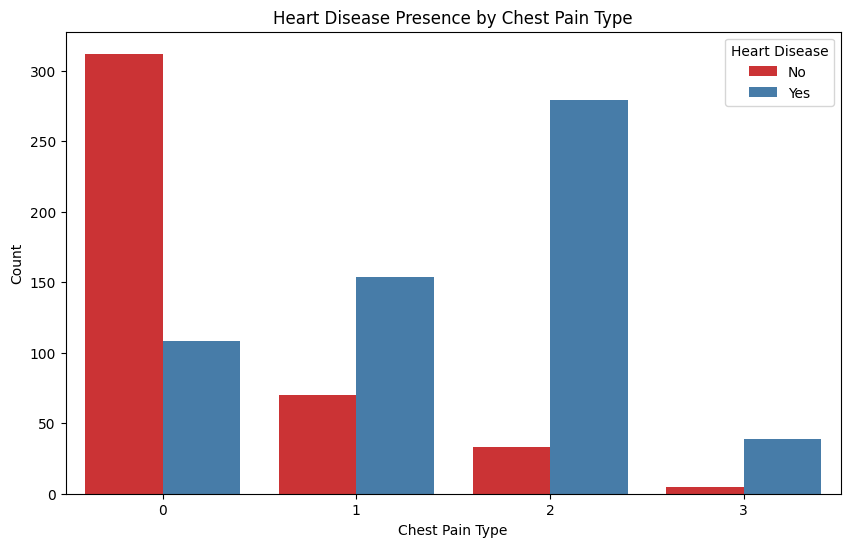

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='chestpain', hue='target', data=df, palette='Set1')
plt.title('Heart Disease Presence by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

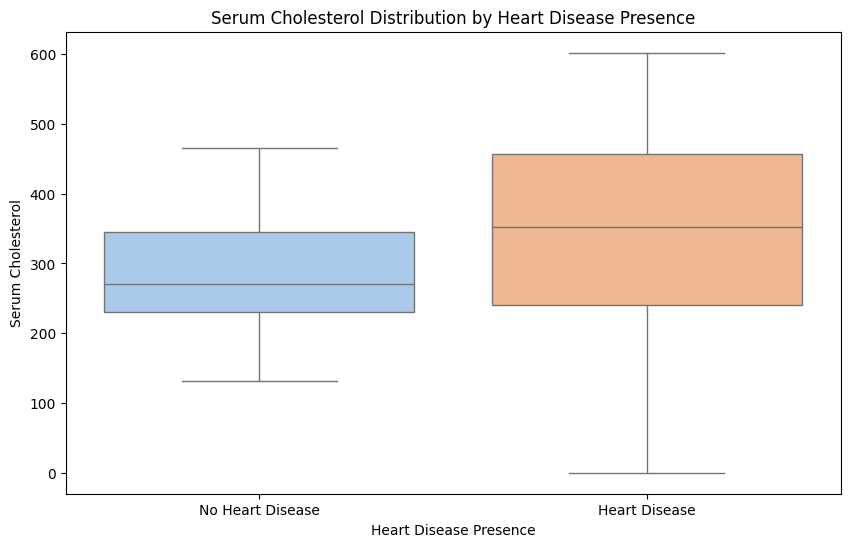

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='serumcholestrol', data=df, palette='pastel')
plt.title('Serum Cholesterol Distribution by Heart Disease Presence')
plt.xlabel('Heart Disease Presence')
plt.ylabel('Serum Cholesterol')
plt.xticks(ticks=[0, 1], labels=['No Heart Disease', 'Heart Disease'])
plt.show()

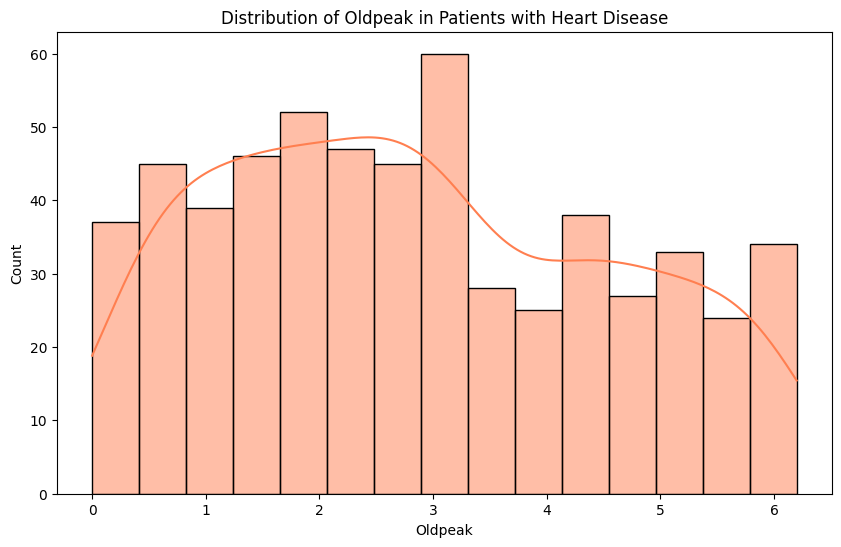

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(x='oldpeak', data=df[df['target'] == 1], bins=15, kde=True, color='coral')
plt.title('Distribution of Oldpeak in Patients with Heart Disease')
plt.xlabel('Oldpeak')
plt.ylabel('Count')
plt.show()

In [ ]:
defects_count = len(df[df['noofmajorvessels'] == 3])
print(f"Number of Patients with Defects in All Three Major Vessels: {defects_count}")

Number of Patients with Defects in All Three Major Vessels: 116


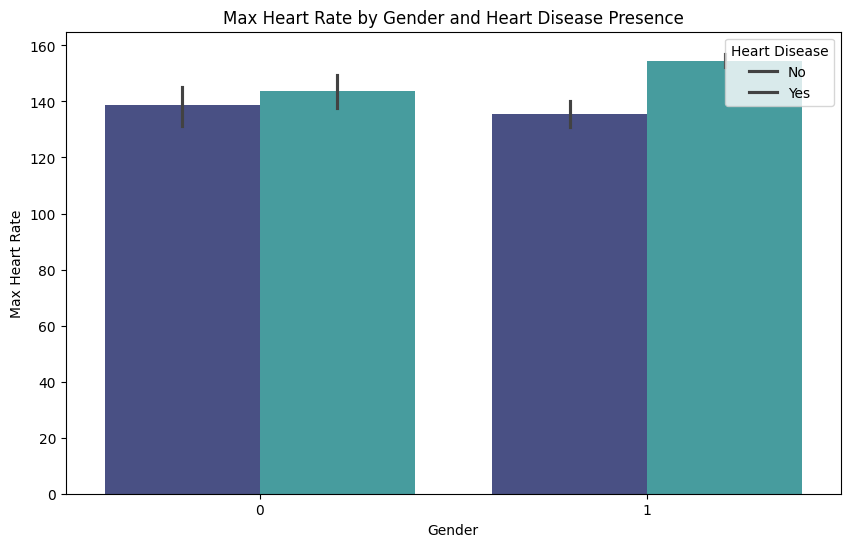

In [ ]:
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='gender', y='maxheartrate', hue='target', data=df, palette='mako')
plt.title('Max Heart Rate by Gender and Heart Disease Presence')
plt.xlabel('Gender')
plt.ylabel('Max Heart Rate')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

In [ ]:
# target classes :
df.target.unique()


array([1, 0])

In [ ]:
df = df.replace({'target' : {
                                    0 : 'Absence of Heart Disease',
                                    1 : 'Presence of Heart Disease',
        }}
)

In [ ]:
df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,Presence of Heart Disease
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,Absence of Heart Disease
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,Absence of Heart Disease
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,Presence of Heart Disease
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,Presence of Heart Disease


In [ ]:
# Create X from DataFrame and y as Target
X_disease = df.drop(columns='target')
y = df.target

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1)).fit_transform(X_disease)
X = pd.DataFrame(scaler, columns=X_disease.columns)
X.describe().T.style.background_gradient(axis=0, cmap='plasma')

,count,mean,std,min,25%,50%,75%,max
patientid,1000.000000,0.500161,0.292886,0.000000,0.246076,0.490432,0.766475,1.000000
age,1000.000000,0.487367,0.297746,0.000000,0.233333,0.483333,0.737500,1.000000
gender,1000.000000,0.765000,0.424211,0.000000,1.000000,1.000000,1.000000,1.000000
chestpain,1000.000000,0.326667,0.317719,0.000000,0.000000,0.333333,0.666667,1.000000
restingBP,1000.000000,0.544783,0.282691,0.000000,0.330189,0.500000,0.820755,1.000000
serumcholestrol,1000.000000,0.517354,0.220006,0.000000,0.391611,0.528239,0.671512,1.000000
fastingbloodsugar,1000.000000,0.296000,0.456719,0.000000,0.000000,0.000000,1.000000,1.000000
restingrelectro,1000.000000,0.374000,0.385061,0.000000,0.000000,0.500000,0.500000,1.000000
maxheartrate,1000.000000,0.568527,0.260994,0.000000,0.372137,0.572519,0.793893,1.000000
exerciseangia,1000.000000,0.498000,0.500246,0.000000,0.000000,0.000000,1.000000,1.000000


In [ ]:
# Define a function to ploting Confusion matrix
def plot_confusion_matrix(y_test, y_prediction):
    '''Plotting Confusion Matrix'''
    cm = metrics.confusion_matrix(y_test, y_prediction)
    ax = plt.subplot()
    ax = sns.heatmap(cm, annot=True, fmt='', cmap="plasma")
    ax.set_xlabel('Predicted labels', fontsize=18)
    ax.set_ylabel('True labels', fontsize=18)
    ax.set_title('Confusion Matrix', fontsize=25)
    ax.xaxis.set_ticklabels(['Absence of Heart Disease','Presence of Heart Disease'])
    ax.yaxis.set_ticklabels(['Absence of Heart Disease','Presence of Heart Disease'])
    plt.show()

In [ ]:
# Define a function to ploting Classification report
def clfr_plot(y_test, y_pred) :
    ''' Plotting Classification report'''
    cr = pd.DataFrame(metrics.classification_report(y_test, y_pred_rf, digits=3,
                                            output_dict=True)).T
    cr.drop(columns='support', inplace=True)
    sns.heatmap(cr, cmap='plasma', annot=True, linecolor='white', linewidths=0.5).xaxis.tick_top()

In [ ]:
def clf_plot(y_pred) :
    '''
    1) Ploting Confusion Matrix
    2) Plotting Classification Report'''
    cm = metrics.confusion_matrix(y_test, y_pred)
    cr = pd.DataFrame(metrics.classification_report(y_test, y_pred, digits=3, output_dict=True)).T
    cr.drop(columns='support', inplace=True)

    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    # Left: Confusion Matrix
    ax[0] = sns.heatmap(cm, annot=True, fmt='', cmap="plasma", ax=ax[0])
    ax[0].set_xlabel('Predicted labels', fontsize=18)
    ax[0].set_ylabel('True labels', fontsize=18)
    ax[0].set_title('Confusion Matrix', fontsize=25)
    ax[0].xaxis.set_ticklabels(['Absence of Heart Disease','Presence of Heart Disease'])
    ax[0].yaxis.set_ticklabels(['Absence of Heart Disease','Presence of Heart Disease'])

    # Right: Classification Report
    ax[1] = sns.heatmap(cr, cmap='plasma', annot=True, linecolor='white', linewidths=0.5, ax=ax[1])
    ax[1].xaxis.tick_top()
    ax[1].set_title('Classification Report', fontsize=25)
    plt.show()

In [ ]:
df.target.value_counts()

,count
target,
Presence of Heart Disease,580
Absence of Heart Disease,420


In [ ]:
# Splite Dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
# Dictionary to define parameters to test in algorithm
parameters = {
    'n_estimators' : [50, 150, 500],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_features' : ['sqrt', 'log2']
}

rf = RandomForestClassifier(n_jobs=-1)
rf_cv = GridSearchCV(estimator=rf, cv=20, param_grid=parameters).fit(X_train, y_train)

print('Tuned hyper parameters : ', rf_cv.best_params_)
print('accuracy : ', rf_cv.best_score_)

Tuned hyper parameters :  {'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 500}
accuracy :  0.9800497866287339


In [ ]:
rf = RandomForestClassifier(**rf_cv.best_params_).fit(X_train, y_train)

In [ ]:
y_pred_rf = rf.predict(X_test)

rf_score = round(rf.score(X_test, y_test), 3)
print('RandomForestClassifier score : ', rf_score)

RandomForestClassifier score :  0.98


In [ ]:
y_test.value_counts()

,count
target,
Presence of Heart Disease,132
Absence of Heart Disease,118


In [ ]:
# Get the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(cm)

# Get the classification report
cr = metrics.classification_report(y_test, y_pred_rf)
print("\nClassification Report:")
print(cr)

Confusion Matrix:
[[114   4]
 [  1 131]]

Classification Report:
                           precision    recall  f1-score   support

 Absence of Heart Disease       0.99      0.97      0.98       118
Presence of Heart Disease       0.97      0.99      0.98       132

                 accuracy                           0.98       250
                macro avg       0.98      0.98      0.98       250
             weighted avg       0.98      0.98      0.98       250



In [ ]:
# Dictionary to define parameters to test in algorithm
parameters = {
    'C' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
    'class_weight' : ['balanced'],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

lr = LogisticRegression()
lr_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=10).fit(X_train, y_train)

print('Tuned hyper parameters : ', lr_cv.best_params_)
print('accuracy : ', lr_cv.best_score_)

Tuned hyper parameters :  {'C': 10, 'class_weight': 'balanced', 'solver': 'lbfgs'}
accuracy :  0.96


In [ ]:
lr = LogisticRegression(**lr_cv.best_params_).fit(X_train, y_train)

In [ ]:
y_pred_lr = lr.predict(X_test)

lr_score = round(lr.score(X_test, y_test), 3)
print('LogisticRegression score : ', lr_score)


LogisticRegression score :  0.976


In [ ]:
# Get the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:")
print(cm)

# Get the classification report
cr = metrics.classification_report(y_test, y_pred_lr)
print("\nClassification Report:")
print(cr)

Confusion Matrix:
[[114   4]
 [  2 130]]

Classification Report:
                           precision    recall  f1-score   support

 Absence of Heart Disease       0.98      0.97      0.97       118
Presence of Heart Disease       0.97      0.98      0.98       132

                 accuracy                           0.98       250
                macro avg       0.98      0.98      0.98       250
             weighted avg       0.98      0.98      0.98       250



In [ ]:
# Dictionary to define parameters to test in algorithm
parameters = {
    'C' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
    'gamma' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
}

svc = SVC()
svc_cv = GridSearchCV(estimator=svc, param_grid=parameters, cv=10).fit(X_train, y_train)

print('Tuned hyper parameters : ', svc_cv.best_params_)
print('accuracy : ', svc_cv.best_score_)

Tuned hyper parameters :  {'C': 10, 'gamma': 0.1}
accuracy :  0.9626666666666667


In [ ]:
# Model
svc = SVC(**svc_cv.best_params_).fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_score = round(svc.score(X_test, y_test), 3)
print('SVC Score : ', svc_score)

SVC Score :  0.968


In [ ]:
# Get the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred_svc)
print("Confusion Matrix:")
print(cm)

# Get the classification report
cr = metrics.classification_report(y_test, y_pred_svc)
print("\nClassification Report:")
print(cr)

Confusion Matrix:
[[112   6]
 [  2 130]]

Classification Report:
                           precision    recall  f1-score   support

 Absence of Heart Disease       0.98      0.95      0.97       118
Presence of Heart Disease       0.96      0.98      0.97       132

                 accuracy                           0.97       250
                macro avg       0.97      0.97      0.97       250
             weighted avg       0.97      0.97      0.97       250



In [ ]:
# Dictionary to define parameters to test in algorithm
parameters = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' : list(np.arange(4, 30, 1))
        }

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(estimator=tree, cv=10, param_grid=parameters).fit(X_train, y_train)


print('Tuned hyper parameters : ', tree_cv.best_params_)
print('accuracy : ', tree_cv.best_score_)

Tuned hyper parameters :  {'criterion': 'entropy', 'max_depth': np.int64(19), 'splitter': 'random'}
accuracy :  0.9719999999999999


In [ ]:
tree = DecisionTreeClassifier(**tree_cv.best_params_).fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

tree_score = round(tree.score(X_test, y_test), 3)
print('DecisionTreeClassifier Score : ', tree_score)

DecisionTreeClassifier Score :  0.972


In [ ]:
# Get the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred_tree)
print("Confusion Matrix:")
print(cm)

# Get the classification report
cr = metrics.classification_report(y_test, y_pred_tree)
print("\nClassification Report:")
print(cr)

Confusion Matrix:
[[113   5]
 [  2 130]]

Classification Report:
                           precision    recall  f1-score   support

 Absence of Heart Disease       0.98      0.96      0.97       118
Presence of Heart Disease       0.96      0.98      0.97       132

                 accuracy                           0.97       250
                macro avg       0.97      0.97      0.97       250
             weighted avg       0.97      0.97      0.97       250



In [ ]:
result = pd.DataFrame({
    'Algorithm' : ['RandomForestClassifier', 'LogisticRegression', 'SVC', 'DecisionTreeClassifier'],
    'Score' : [rf_score, lr_score, svc_score, tree_score]
})

result.sort_values(by='Score', inplace=True)

In [ ]:
sns.set_palette("viridis")

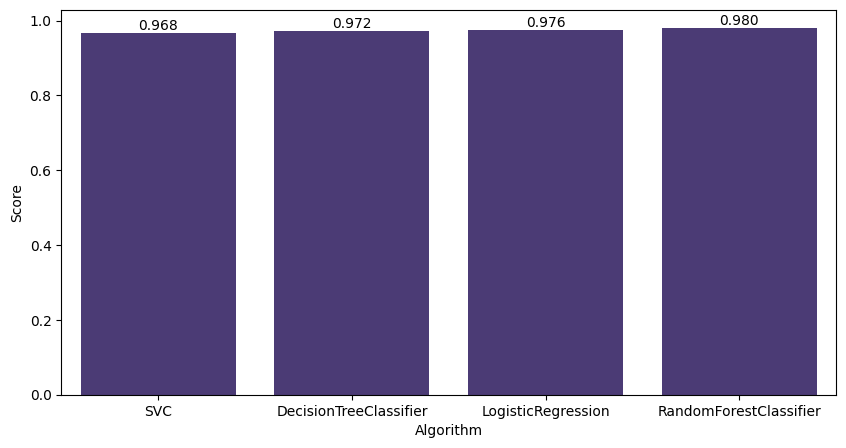

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

sns.barplot(x='Algorithm', y='Score', data=result)
ax.bar_label(ax.containers[0], fmt='%.3f')
ax.set_xticklabels(labels=result.Algorithm, rotation=360)
plt.show()

In [ ]:
# Model
rf = RandomForestClassifier(**rf_cv.best_params_)

In [ ]:
rf.fit(X, y)

RandomForestClassifier(criterion='entropy', max_features='log2',
                       n_estimators=500)

In [ ]:
import joblib

joblib.dump(rf, 'heart_attack_model.pkl')

['heart_attack_model.pkl']

In [ ]:
from google.colab import files
files.download('heart_attack_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
test_data = np.array([[62, 1, 3, 150, 280, 1, 2, 110, 1, 3.5, 2, 3, 2]])
print("Prediction:", rf.predict(test_data))
print("Confidence (class 1):", rf.predict_proba(test_data)[0][1])

Prediction: ['Presence of Heart Disease']
Confidence (class 1): 0.936
